In [33]:
import matplotlib.pyplot as plt

# Programming for Physics
<hr style="height: 2px; border-width: 0; color: gray; background-color: gray;" />

   &emsp;&emsp;&emsp;&emsp; __Lecture 16__ &mdash; Python Class
   

## Class
Everything is an object!

Every object has a type.

We have seen many built in types

> int, float, string, bool, list, set, dictionary, tuple



Type is also known as Class

A way to organize functions and variable tied to a special object.



Object-oriented programming is a programming paradigm based on the concept of "objects", which can contain data and code: data in the form of fields (often known as attributes or properties), and code, in the form of procedures (often known as methods).

It is kind of like how RPG game focuses on the characters.

In [2]:
a = 3+4j
print(type(a))
print(a.real)

<class 'complex'>
3.0


In [6]:
import numpy as np
a = np.array([1,0])
type(a)

numpy.ndarray

## User-defined Class

```python
class <classname>:
    a=... # class variable
    ...
    def class_func(self, argument1, argument2)
        <functions body>
    ...
```

variables and functions made in a class is tied to the class. 

When defining a function within a class (also known as method), the first argument refers to the object itself.

The self parameter is a reference to the current instance of the class, and is used to access variables that belongs to the class.

It does not have to be named self , you can call it whatever you like, but it has to be the first parameter of any function in the class:

When calling a method, the variable itself is implicitly passed into the method as the first input.

In [72]:
class Dog:
    picture='🐶'
    def bark(self,n):
        print(self.picture + 'woof!'*n)

In [73]:
a = Dog()
print(type(a))
print(a.picture)
print(id(a))
a.bark(4)

b = Dog()
print(type(b))
print(b.picture)
print(id(b))

<class '__main__.Dog'>
🐶
2194712447008
🐶woof!woof!woof!woof!
<class '__main__.Dog'>
🐶
2194712448736


## an Object can be updated in place (mutable)

In [79]:
a = Dog()
print(id(a))
print(a.picture)

a.picture = '🍀'
print(id(a)) #same id
print(a.picture) #different picture

2194712447920
🐶
2194712447920
🍀


### Each dog has its own name
customize an object of the class with arguments

a special class function 
```python
def __init__(self, argument1, argument2)
```

The \_\_init\_\_() function is called automatically every time the class is being used to create a new object.

In [1]:
class Dog:
    message='🐶'
    def __init__(self,name):
        self.name=name
    def bark(self,n):
        print('woof!'*n)

In [12]:
a = Dog('DD')

In [13]:
print(a.name)
print(a.message)
a.bark(4) #only one (the second) argument is used. The first argument of bark is the object itself

DD
🐶
woofwoofwoofwoof


## \_\_str\_\_() method

The \_\_str\_\_() function (__two underscores__) controls what should be returned when the class object is represented as a string. It controls what is printed when printing the object using the print() function

```python
    class Dog:
        picture='🐶'
        def __init__(self,name):
            self.name=name
        def bark(self,n):
            print('woof'*n)
        def __str__(self):
            return 'hello, I\'m a dog'
```

In [2]:
class Dog:
    picture='🐶'
    def __init__(self,name):
        self.name=name
    def bark(self,n):
        print('woof'*n)
    def __str__(self):
        return 'hello, I\'m a dog'

In [3]:
a=Dog('luna')
print(a)

hello, I'm a dog


# Formatting string

start a string with f and you can insert a variable into a string 

```python
    fruit = 'apple'
    text = f'I like {fruit}'
    print(text)
```
We can use the f string in class
```python
    class Dog:
        picture='🐶'
        def __init__(self,name):
            self.name=name
        def bark(self,n):
            print('woof'*n)
        def __str__(self):
            return f'hello, I\'m a dog, my name is {self.name}'
```


In [5]:
fruit = 'apple'
text1 = f'I like {fruit}' #with formatting
print(text1)
text2 = 'I like {fruit}' #without formatting
print(text2)

I like apple
I like {fruit}


In [62]:
class Dog:
    picture='🐶'
    def __init__(self,name):
        self.name=name
    def bark(self,n):
        print('woof'*n)
    def __str__(self):
        return f'hello, I\'m a dog, my name is {self.name}'

In [63]:
a = Dog('luna')
print(a)

hello, I'm a dog, my name is luna


### Read about [Class Inheritance]('https://www.w3schools.com/python/python_inheritance.asp')

## Let us make a Ball class
How to describe a ball? 

position, velocity, acceleration and time

the ball moves based on Newton's second law

\begin{equation}
\begin{aligned}
t_{n+1} &= t_{n} + \Delta t \\
v_{n+1} &= v_{n} + a \Delta t\\
x_{n+1} &= x_{n} + v_{n+1} \Delta t ?
\end{aligned}
\end{equation}

In [18]:
class Ball:
    def __init__(self,x=0,v=0,a=0,t=0):
        self.x=x
        self.v=v
        self.a=a
        self.t=t
        self.time_list=[]
        self.pos_list=[]
    def move(self,dt):
        self.t=self.t+dt
        self.v=self.v+self.a*dt
        self.x=self.x+self.v*dt
    def record(self): #record the current position and time to the lists
        self.time_list.append(self.t)
        self.pos_list.append(self.x)
    def clear(self): #clear the history
        self.time_list=[]
        self.pos_list=[]
    def plot_path(self): #draw the path
        import matplotlib.pyplot as plt
        plt.plot(self.time_list,self.pos_list)
        plt.xlabel('time')
        plt.ylabel('position')

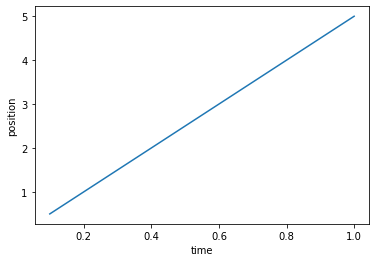

In [9]:
#simulate motion with constant speed 
ball1 = Ball(v=5)
for i in range(10):
    ball1.move(0.1)
    ball1.record()
ball1.plot_path()

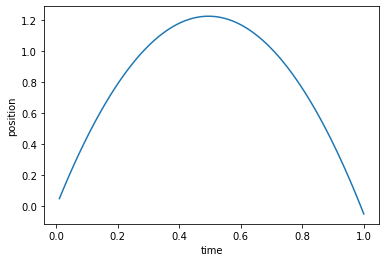

In [11]:
ball1 = Ball(v=5,a=-10)
t_max=1
num_step=100
dt=t_max/num_step
for i in range(num_step):
    ball1.move(dt)
    ball1.record()
ball1.plot_path()

## Pass an object to a function

An object of a user defined class can be thought of as a mutable variable. It can be updated __in place__

In [20]:
def motion(t_max,num_step,ball,f_a=lambda x,v,t:0):
    '''
    a function that takes a ball object as an input
    it simulates the motion
    the acceleration is given by lambda function fa
    '''
    dt = t_max/num_step
    for i_step in range(num_step):
        ball.a=f_a(ball.x,ball.v,ball.t)
        ball.move(dt)
        ball.record()

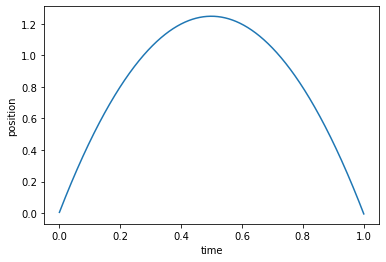

In [22]:
ball1=Ball(v=5)
motion(t_max=1,num_step=1000,ball=ball1,f_a=lambda x,v,t:-10)
ball1.plot_path()

# A ball moving in a plane

\begin{equation}
\begin{aligned}
t_{n+1} &= t_{n} + \Delta t \\
\vec v_{n+1} &= \vec v_{n} + \vec a \Delta t\\
\vec x_{n+1} &= \vec x_{n} + \vec v_{n+1} \Delta t ?
\end{aligned}
\end{equation}

Use a vector instead of a number for position, velocity and acceleration

Use numpy array to represent a vector

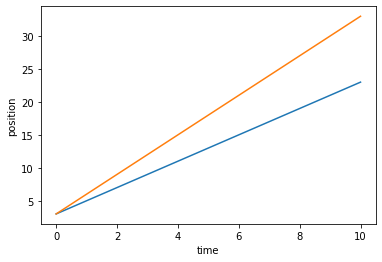

In [61]:
#position, velocity and acceleration now are 2d vectors.
#the update rule still works, but requires adding two vectors (not list) together
#we need numpy array for elemental wise sum.
ball=Ball(x=np.array([3.0,3.0]),v=np.array([2.0,3.0]), a=np.array([0.0,0.0]))
motion(dt=0.001,num_step=10000,ball=ball,f_a=lambda x,v,t:np.array([0.0,0.0]))
ball.plot_path()#plots x position and y position as a function time 

A ball moves in a 2D plane attached to spring. 
The acceleration is $\vec a = - \vec x$

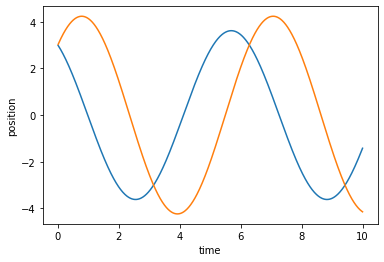

In [25]:
import numpy as np
ball=Ball(x=np.array([3.0,3.0]),v=np.array([-2.0,3.0]), a=np.array([0.0,0.0]))
motion(t_max=10,num_step=1000,ball=ball,f_a=lambda r,v,t:-1*r)
ball.plot_path()

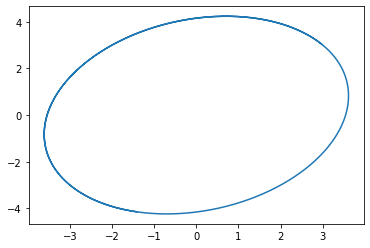

In [29]:
import matplotlib.pyplot as plt
# the trajectory
pos=ball.pos_list #obtain the past position list
pos=np.array(pos) #change to array
#pos is a num_stepp*2 array. 
#The first column stores the x position
#The second stores the y position
plt.plot(pos[:,0],pos[:,1]) #plot y position as a function of x position